In [ ]:
import pandas as pd

# Import Dataset
abnormal_df = pd.read_csv('abnormal_arrest_dates.csv')

abnormal_df.head()

In [7]:
# Data Cleaning
abnormal_df.columns
abnormal_df_clean = abnormal_df[['arrestdate', 'CountyName', 'ST']] # select only columns with data, most are empty

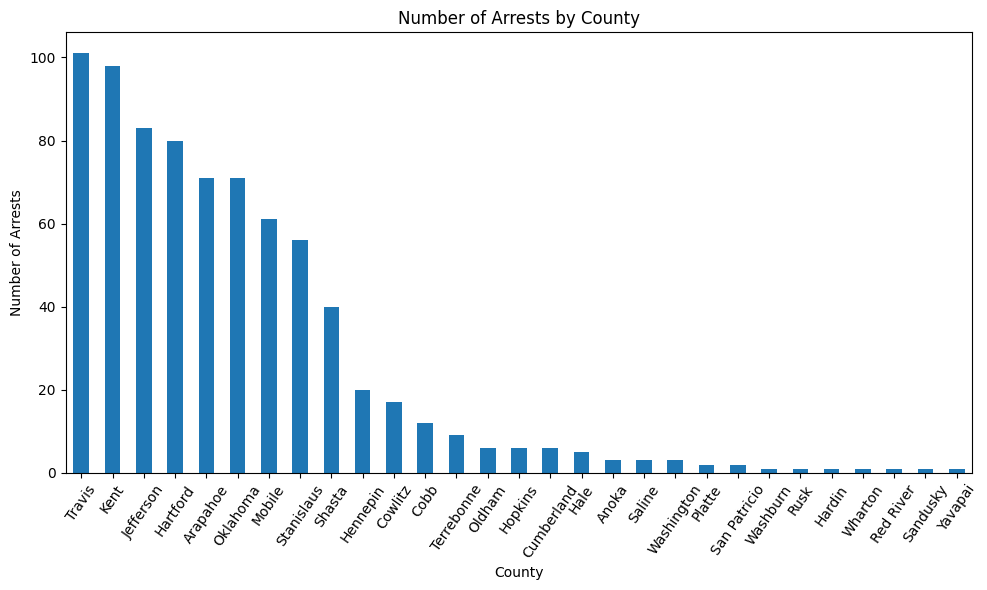

/var/folders/zm/jz85j2vx4zv0dlk92v3bzqh00000gn/T/ipykernel_1542/3034986733.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnormal_df_clean['arrestdate'] = pd.to_datetime(abnormal_df_clean['arrestdate'], errors='coerce')


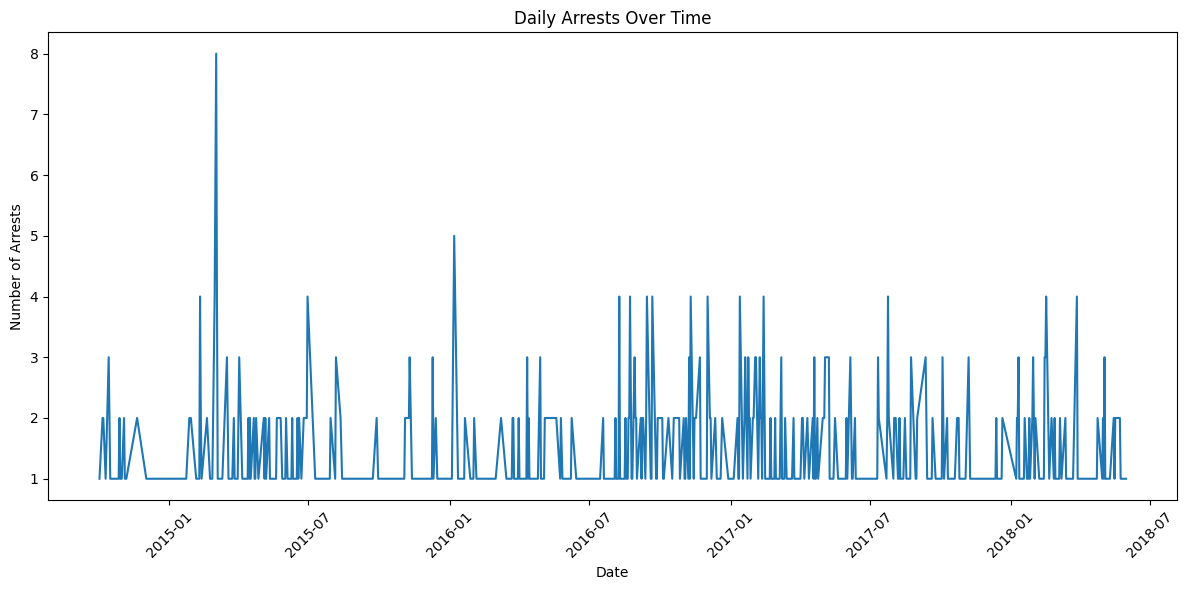

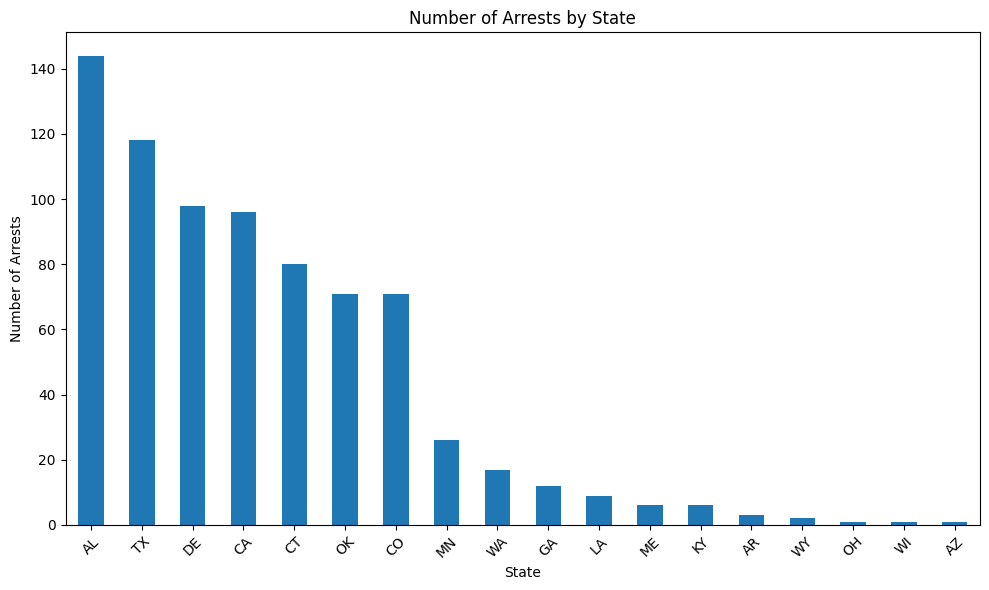

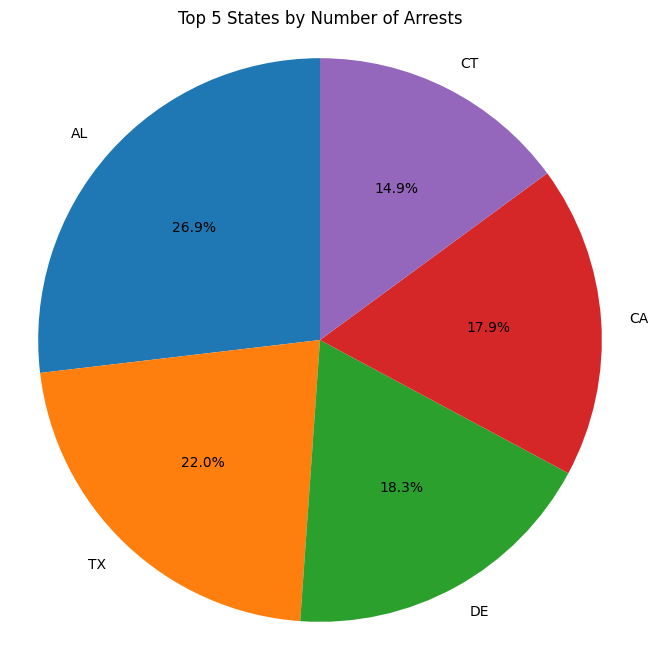

In [20]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Count arrests by CountyName
county_counts = abnormal_df_clean['CountyName'].value_counts()

# Plot
plt.figure(figsize = (10, 6))
county_counts.plot(kind = 'bar')
plt.title('Number of Arrests by County')
plt.xlabel('County')
plt.ylabel('Number of Arrests')
plt.xticks(rotation = 55)
plt.tight_layout()
plt.show()

# 2. Time Series - Number of Arrests
abnormal_df_clean['arrestdate'] = pd.to_datetime(abnormal_df_clean['arrestdate'], errors = 'coerce')

# Group by date and count
daily_arrests = abnormal_df_clean.groupby(abnormal_df_clean['arrestdate'].dt.date).size()

# Plot
plt.figure(figsize = (12, 6))
daily_arrests.plot(kind = 'line')
plt.title('Daily Arrests Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Arrests')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# 3. Count arrests by state
state_counts = abnormal_df_clean['ST'].value_counts()

# Plot
plt.figure(figsize = (10, 6))
state_counts.plot(kind = 'bar')
plt.title('Number of Arrests by State')
plt.xlabel('State')
plt.ylabel('Number of Arrests')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# 4. Pie chart showing top 5 states by number of arrests
plt.figure(figsize = (8, 8))
state_counts.head(5).plot(kind = 'pie', autopct = '%1.1f%%', startangle = 90)
plt.title('Top 5 States by Number of Arrests')
plt.ylabel('')
plt.axis('equal')
plt.show()